# 🎲 Logistic Regression

**Logistic regression** is a process of modeling the probability of a discrete outcome given an input variable.

Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical. 

For example : 
- To predict whether an email is spam (1) or (0)
- Whether the tumor is malignant (1) or not (0)

<center><img src="https://blog.developerspoint.org/assets/img/logistic_banner.jpg" width=900></center>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
plt.style.use('seaborn-whitegrid')

Let's first start by loading the data in a dataframe.

In [4]:
df_students = pd.read_csv('data/students.csv')

# 🦮 Data Exploration & Linear Regression Approach

In this dataset, the features represent the marks obtained by students on two subjects, and the target is the student being admitted to a major.

In [5]:
df_students.head()

,mark1,mark2,admitted
0,6.9247,15.605,0
1,6.0573,8.779,0
2,7.1695,14.580,0
3,12.0370,17.262,1
4,15.8070,15.069,1


Since we already worked on a linear regression problem already in our last notebook, we may be tempted by plotting a linear regression line.

For the sake of an example, let's make it easier : since we are dealing with students' marks, we can just go ahead and sum up mark1 and mark2 to get an average mark and decide whether the student is admitted or not.

In [6]:
df_students['average_mark'] = df_students.apply(lambda row: (row.mark1+row.mark2)/2, axis = 1)

In [7]:
df_students.head()

,mark1,mark2,admitted,average_mark
0,6.9247,15.605,0,11.26485
1,6.0573,8.779,0,7.41815
2,7.1695,14.580,0,10.87475
3,12.0370,17.262,1,14.64950
4,15.8070,15.069,1,15.43800


For comprehension and intuition reasons, let's just reindex the columns to adjust their positioning.

In [8]:
df_students.columns

Index(['mark1', 'mark2', 'admitted', 'average_mark'], dtype='object')

In [9]:
new_cols = ['mark1', 'mark2','average_mark', 'admitted']

#or
df_students = df_students.reindex(columns=new_cols)
df_students.head()

,mark1,mark2,average_mark,admitted
0,6.9247,15.605,11.26485,0
1,6.0573,8.779,7.41815,0
2,7.1695,14.580,10.87475,0
3,12.0370,17.262,14.64950,1
4,15.8070,15.069,15.43800,1


In [10]:
features = ['average_mark']
target = 'admitted'

In [16]:
X = df_students[features].values
y = df_students[target].values.astype(np.int32).reshape(-1,1)

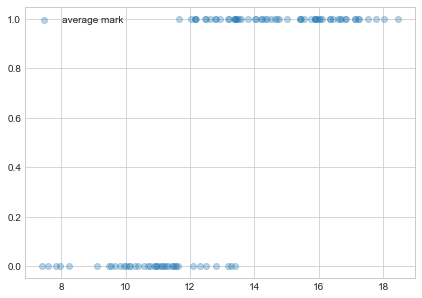

In [18]:
plt.figure(figsize=(7,5))
plt.scatter(X,y, label="average mark",alpha=0.3,cmap='viridis')
plt.legend()

## A Linear Approach

Let's use the built-in sklearn linear model to determine the linear regression line.

In [19]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [20]:
y_pred = reg.predict(X)
y_pred[:15]

array([[ 0.32301602],
       [-0.23139612],
       [ 0.2667922 ],
       [ 0.81083444],
       [ 0.92447833],
       [ 0.1608735 ],
       [ 0.97110332],
       [ 0.45172837],
       [ 1.05621013],
       [ 0.54381812],
       [ 0.63198042],
       [ 0.22169496],
       [ 0.98796614],
       [ 1.1075913 ],
       [ 0.36517308]])

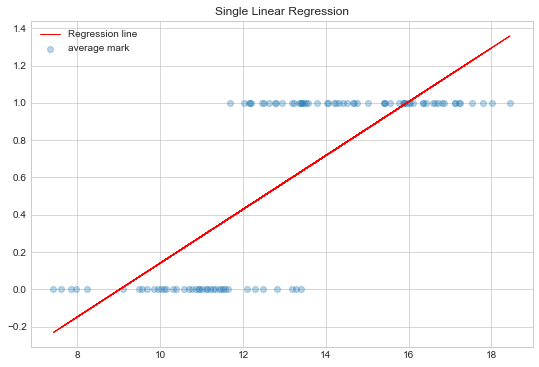

In [21]:
plt.figure(figsize=(9,6))
plt.scatter(X,y, label="average mark",alpha=0.3,cmap='viridis')
plt.plot(X, y_pred, color='red', linewidth=1,label="Regression line")
plt.title('Single Linear Regression')
plt.legend()

This looks good, but what could tell us that a student is admitted or not ?
We may think that, if the value of the prediction function $h_{\theta}$ has a value higher than 0.5,then, that student is assigned to class 1 (admitted).

Let's go ahead and make that intersection point more visible.

In [25]:
random_student = np.array([12.5]).reshape(-1,1)
prediction = reg.predict(random_student)
print('{:.2f}% of getting admitted'.format(prediction[0][0]*100))

50.10% of getting admitted


In [26]:
reg.intercept_, reg.coef_

(array([-1.30054955]), array([[0.14412669]]))

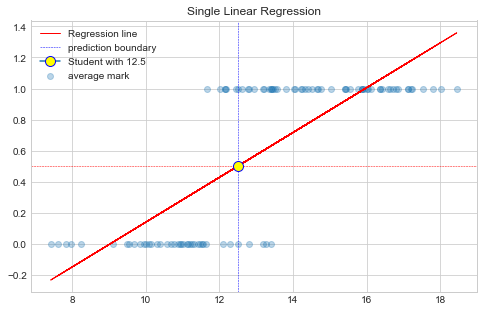

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(X,y, label="average mark",alpha=0.3,cmap='viridis')
plt.plot(X, y_pred, color='red', linewidth=1,label="Regression line")
plt.axhline(y=0.5, color='r', linestyle='--',linewidth=0.5)
plt.axvline(x=12.5, color='b',linestyle='--',linewidth=0.5,label='prediction boundary')
plt.plot(random_student,prediction, marker="o", markersize=10, markeredgecolor="blue", markerfacecolor="yellow",zorder=20,label='Student with 12.5')
plt.title('Single Linear Regression')
plt.legend()

Let's look at this problem, here comes a student with an average mark of 12.5... What would you predict for him ? To be admitted or rejected ?

The model is saying that this student has 50.10% of chance of getting admitted.

However,iff we look at our dataset, it seems like some students with an average grade of 12.5 are both accepted and rejected.

This will lead to high risk problems if we were to predict whether a tumor is malign or benign. We can easily kill people if we make wrong predictions using Linear Regression on classification problems.

## 🐍 Sigmoid activation

It is true, when we wanted to predict the admission of a student, we were talking using percentage.

We say words like "50%" of chance, or "10%" of risk. These are probabilities, but our output of predictions' vector had negative values, which is not possible for probabilities.


In order to map predicted values to probabilities, we use the **sigmoid function**. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

$$ S(z) = \frac{1}{1 + e^{-z}}$$

Where :

- $s(z)$ = output between 0 and 1 (probability estimate)
- $z$ = input to the function (your algorithm’s prediction e.g. $y = mx + b$)
- $e$ = base of natural log

In [28]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

assert sigmoid(0) == 0.5

In [29]:
x_values = np.linspace(start = -5, stop = 5, num = 201)
logistic_sigmoid_values = sigmoid(x_values)

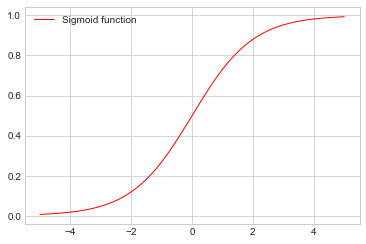

In [30]:
plt.plot(x_values, logistic_sigmoid_values, color='red', linewidth=1,label="Sigmoid function")
plt.legend()

In [31]:
y_pred_prob = sigmoid(y_pred)
y_pred_prob[:5]

array([[0.5800591 ],
       [0.44240772],
       [0.56630523],
       [0.69228729],
       [0.71595372]])

## Decision boundaries

Our current prediction function returns a probability score between 0 and 1. In order to map this to a discrete class (true/false, benign/malign), we select a threshold value or a point above which we will classify values into class 1 and below which we classify values into class 2, such as :

$$
p \ge 0.5 , class=1 \\
p \le 0.5 , class=0
$$

For example, if our threshold was .5 and our prediction function returned .7, we would classify this observation as positive.
If our prediction was .2 we would classify the observation as negative.

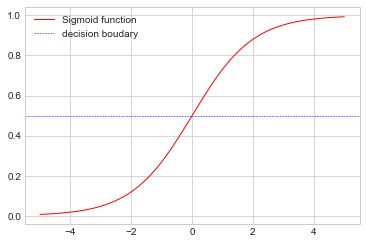

In [32]:
plt.plot(x_values, logistic_sigmoid_values, color='red', linewidth=1,label="Sigmoid function")
plt.axhline(y=0.5, color='blue', linestyle='--',linewidth=0.5, label='decision boudary')
plt.legend()

Using our knowledge of sigmoid functions and decision boundaries, we can now write a prediction function. 

A prediction function in logistic regression returns the probability of our observation being positive, True, or “Yes”. We call this class 1 and its notation is $P(class=1)$

We will be using the same function we did for the Linear regression.

In [314]:
def predict_Y(X, theta):
  '''
  Returns 1D array of probabilities
  that the class label == 1
  '''
  z = np.dot(X, theta)
  return sigmoid(z)

# 🚧 Moving to the Logistic Regression

Let's go back to our dataset using two features; mark1 and mark2.

In [ ]:
df_students.pop('average_mark')


In [183]:
df_students.head()

,mark1,mark2,admitted
0,6.9247,15.605,0
1,6.0573,8.779,0
2,7.1695,14.580,0
3,12.0370,17.262,1
4,15.8070,15.069,1


In [184]:
features = ['mark1', 'mark2']
target = 'admitted'

In [356]:
X = df_students[features].values
y = df_students[target].values.astype(np.int32).reshape(len(y),1)
X.shape,y.shape

((100, 2), (100, 1))

In [357]:
admitted = X[np.where(y==1),:].reshape(-1,2)
rejected = X[np.where(y==0),:].reshape(-1,2)

In [358]:
X[:5],y[:5]

(array([[ 6.9247, 15.605 ],
        [ 6.0573,  8.779 ],
        [ 7.1695, 14.58  ],
        [12.037 , 17.262 ],
        [15.807 , 15.069 ]]),
 array([[0],
        [0],
        [0],
        [1],
        [1]]))

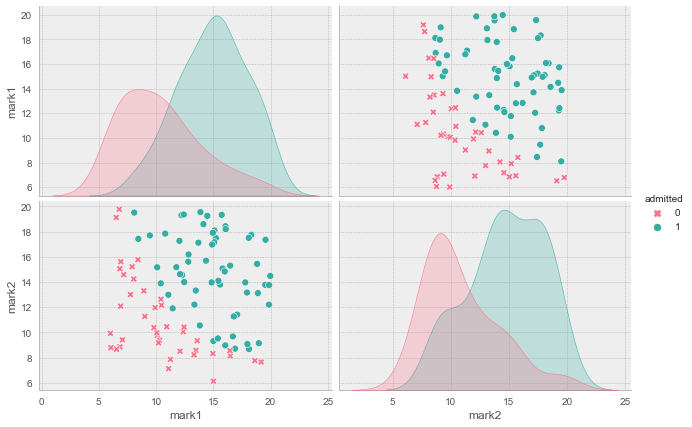

In [359]:
sns.pairplot(df_students, hue='admitted', height=3,aspect=1.5, palette="husl",markers=["X", "o"])

We notice a tendancy in these data, there may be a line separing the two classes. This reminds us of the decision boundaries we talk about earlier.

In [39]:
df_students['admitted'].value_counts()

1    60
0    40
Name: admitted, dtype: int64

<AxesSubplot:xlabel='admitted', ylabel='count'>

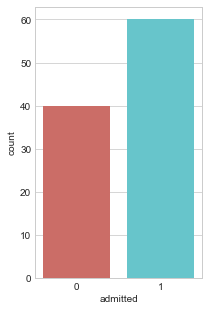

In [40]:
plt.figure(figsize=(3,5))
sns.countplot(x='admitted',data=df_students,palette='hls')

# 🔨 Model Building

Let's reuse the functions we made on the previous notebook.

Since we are dealing with a regression problem, we will always need a column of ones stacked to our features that will be multipied by the biais $\theta_{0}$. 

In [41]:
def add_theta_0(X):
  intercept = np.ones(len(X))
  return np.vstack((intercept, X.T)).T

As for every regression problem, weight parameters need to be initialized.

In [42]:
def initialize_theta(n_features,is_random=True):
  """
  Returns bias (intercept) and weight for a vector X of n features in the form of a ndarray [theta_0,theta_1,..., theta_n].
  theta_0 being the bias, and the others the weights.
  n has to be greater or equal to 1.
  
  Parameters:
  n_features: number of features of X. If errors occur, reshape(-1,1) your vector.
  is_random: if set to False, will set values of bias and theta to zero.
  """
  if is_random:
    return np.random.rand(n_features,1) 
  else:
    return np.zeros(shape=(n_features,1))

## 💱 Another cost function

In linear regression, we used a cost function known as **MSE** (Mean Squared Error),also called L2 loss.

Unfortunately we can’t (or at least shouldn’t) use the same cost function MSE (L2) as we did for linear regression. 
Why? There is a great math explanation : *using MSE means that we assume that the underlying data has been generated from a normal distribution (a bell-shaped curve). In Bayesian terms this means we assume a Gaussian prior. While in reality, a dataset that can be classified into two categories (i.e binary) is not from a normal distribution but a Bernoulli distribution.* (ref no.6)
* This means that Binary Classification presents a unique problem : each example $(x, y)$ belongs to one of two complementary classes.

 Further, we only need to predict for the positive class i.e $P(y=1 | x ) = \hat{p}$ because the probability for the negative class can be derived from it i.e :
 $$P(y=0 | x ) =1-P(y=1 | x ) = 1-p̂$$


A good binary classifier should produce a high value of p̂ when the example has a positive label(y=1). On the other hand, for a negative labeled example(y=0) the classifier should produce a low value of p̂. In other words: 
- maximize p̂ when y=1 and
- maximize 1-p̂ when y=0.

Another reason is that the MSE function is non-convex for binary classification. In simple terms, if a binary classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function. This is because MSE function expects real-valued inputs in range(-∞, ∞), while binary classification models output probabilities in range(0,1) through the sigmoid/logistic function.

<center><img src="images/mse_sigmoid.png"></center>


For now,let's simply say it’s because our prediction function is non-linear (due to sigmoid transform). Squaring this prediction as we do in MSE results in a non-convex function with many local minimums. If our cost function has many local minimums, gradient descent may not find the optimal global minimum.

*MSE is a good choice for a Cost function when we are doing Linear Regression (i.e fitting a line through data for extrapolation). In the absence of any knowledge of how the data is distributed assuming normal/gaussian distribution is perfectly reasonable.*

Instead of Mean Squared Error, we use a cost function called *Cross-Entropy*, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for $y=1$ and one for $y=0$.



$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}cost(h_{\theta}(x^{(i)}),y^{(i)})$$

Where : 
- $cost(h_{\theta}(x),y) = -\log(h_{\theta}(x))$ if $y=1$
- $cost(h_{\theta}(x),y) = -\log(1 - h_{\theta}(x))$ if $y=0$


In [47]:
def h_theta(X,theta):
  return sigmoid(X.dot(theta))

In [61]:
def cross_entropy(y, h_theta):
    if np.any(y) == 1:
      return -np.log(h_theta)
    else:
      return -np.log(1 - h_theta)

In [63]:
def compute_cost(X,y,theta):  
    '''
    Returns the cost function value.
    '''
    m = len(y)
    # initialize J (the cost)
    J = 0 

    # Calculate h = X * theta 
    h = h_theta(X,theta)
    
    cost = cross_entropy(y,h)
    
    # Compute the total cost J 
    J = cost.sum()/m
     
    return J

Instead of these two conditions, we can write the above cost function into a compressed one : 

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}[y^{(i)}\log(h_{\theta}(x^{(i)}) + (1 - y^{(i)})\log(1 - h_{\theta}(x^{(i)}))]$$

In [64]:
def get_cost(X,y,theta):  
       
    m = len(y)

    # Calculate h = X * theta 
    h = h_theta(X,theta)
    
    return -1/m * np.sum((y * np.log(h) + (1 - y) * np.log(1 - h)))

In [121]:
import time
def gradient_descent(X, y, theta, num_iters=100, alpha=0.0001,verbose=False):
  '''
  Parameters:
  X : training samples
  y : training labels
  num_iters : epoches of the algorithm to reach convergence
  alpha: step of the partial derivatives
  verbose : if set to True, will log the values of the cost and theta values.
  
  Returns theta updated values, cost_history and theta history.
  '''
  
  # Number of training examples
  m = len(y)
                    
  # History of costs
  result_idx = 0
  gd_iterations_df = pd.DataFrame(columns=['iteration','cost']) 
  J_history = [] 
  theta_history = []
  parameters_out = {}
  
  # Append the initial cost
  gd_iterations_df.loc[result_idx]=[0,get_cost(X,y,theta)]
  result_idx += 1
  
  start = time.time()
  for i in range(1,num_iters+1):
    
      # Step 1 : Calculate h = sigmoid(X * theta)
      h = h_theta(X,theta)
      
      # Step 2 :Calculate the error = (h - y) 
      error = np.subtract(h, y)
      
      # Step 3 : Calculate the new theta
      theta_new = alpha * 1/m * np.sum(np.dot(X.T, error),axis=1).reshape(-1,1)
      # Step 4 : Update theta
      theta = np.subtract(theta, theta_new)

      # Step 5 : Compute the cost to keep history of it
      cost = get_cost(X,y,theta)
      
      gd_iterations_df.loc[result_idx]=[i,cost]
      result_idx += 1
      
      J_history.append(cost)
      theta_history.append(theta.tolist())
      
      if verbose:
          print('{}/{} [>==================]  - loss: {:.2f} - theta = {}'.format(i+1,num_iters,cost,theta))
          
  print('Time spent: {:0.2f}s'.format(time.time()-start))
  parameters_out["bias"] = theta[0][0]
  parameters_out["weight"] = theta[1:]
  return parameters_out,theta, theta_history, J_history,gd_iterations_df 

To check if our model performs well, let's use the accuracy measure we defined in our fist notebook.

In [301]:
def accuracy(predicted_labels, actual_labels):
  '''
  Accuracy measures how correct our predictions were. 
  In this case we simply compare predicted labels to true labels and divide by the total.
  '''
  diff = predicted_labels - actual_labels
  return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

## 🧪 Trying our model

In [312]:
X = add_theta_0(X)
X[:5]

array([[ 1.    ,  6.9247, 15.605 ],
       [ 1.    ,  6.0573,  8.779 ],
       [ 1.    ,  7.1695, 14.58  ],
       [ 1.    , 12.037 , 17.262 ],
       [ 1.    , 15.807 , 15.069 ]])

Initialisation de $\theta_0$ et $\theta_1$

Let's try with two samples.

In [162]:
theta = initialize_theta(X.shape[1],is_random=False)
theta

array([[0.],
       [0.],
       [0.]])

In [ ]:
initial_cost = compute_cost(X,y,theta)
print('initial cost: ',initial_cost)

In [164]:
iterations = 40000
my_alpha = 0.05

In [165]:
# Appel
parameters_out,theta, theta_history, J_history,gd_iterations_df = gradient_descent(X, y, theta, num_iters=iterations, alpha=my_alpha)

Time spent: 37.55s


In [166]:
theta

array([[-19.3792228 ],
       [  0.80015259],
       [  0.77333736]])

In [283]:
gd_iterations_df

,iteration,cost
0,0.0,0.693147
1,1.0,1.047848
2,2.0,1.360426
3,3.0,2.441395
4,4.0,0.763338
...,...,...
39996,39996.0,0.209681
39997,39997.0,0.209681
39998,39998.0,0.209680
39999,39999.0,0.209680


In [329]:
parameters_out

{'bias': -19.3792228004942,
 'weight': array([[0.80015259],
        [0.77333736]])}

### History

Text(0, 0.5, 'Cost (J)')

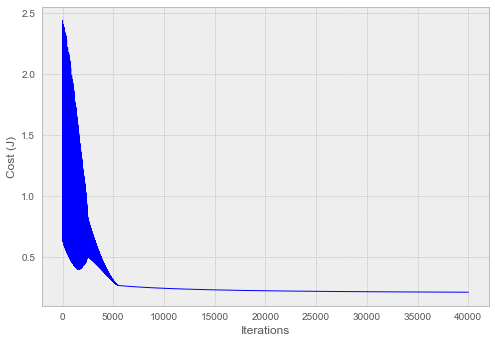

In [298]:
# Plot the J history
plt.plot(J_history[0:len(J_history)], color='blue', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")

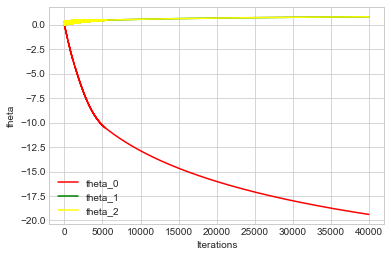

In [170]:
history = np.asarray(theta_history)

theta_0 = history[:,0]
theta_1 = history[:,1]
theta_2 = history[:,2]

plt.plot(theta_0[0:len(theta_0)], color='red', label='theta_0')
plt.plot(theta_1[0:len(theta_1)], color='green', label='theta_1')
plt.plot(theta_1[0:len(theta_2)], color='yellow', label='theta_2')
plt.xlabel("Iterations")
plt.ylabel("theta")
plt.legend()

#  ✂ Drawing the Descision Boundary

## Mapping probabilities to classes

The final step is assign class labels (0 or 1) to our predicted probabilities.

In [361]:
def decision_boundary(prob):
  return 1 if prob >= .5 else 0

<AxesSubplot:xlabel='mark1', ylabel='mark2'>

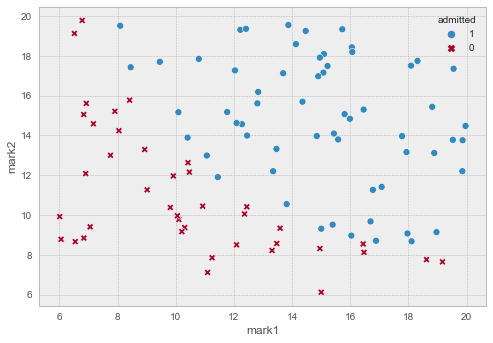

In [424]:
markers = {1: "o", 0: "X"}
hue_order = [1,0]
sns.scatterplot(data=df_students, x="mark1", y="mark2",hue="admitted",style="admitted",markers=markers,hue_order=hue_order)

We notice that there is a line separing admitted students from rejected ones, let's try to draw that line.


🔺 To do : add explanations for finding the $c$ and $m$ coefficients.

In [425]:
def plot_decision_line(X,parameters):
  # Retrieve the model parameters.
  b = parameters['bias']
  w1, w2 = parameters['weight']
  
  # Calculate the intercept and gradient of the decision boundary.
  c = -b/w2
  m = -w1/w2
  
  # Plot the data and the classification with the decision boundary.
  xmin, xmax = X.min(), X.max()
  ymin, ymax = X.min(),X.max()
  
  xd = np.array([xmin, xmax])
  yd = m*xd + c
  
  plt.plot(xd, yd, 'k', lw=1, ls='--',alpha=0.2)
  plt.fill_between(xd, yd, ymin, color='tab:red', alpha=0.2)
  plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2)

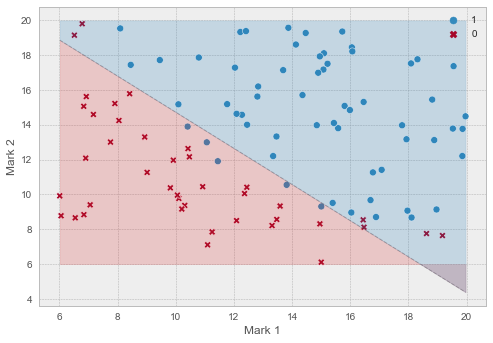

In [426]:
markers = {1: "o", 0: "X"}
hue_order = [1,0]
sns.scatterplot(data=df_students, x="mark1", y="mark2",hue="admitted",style="admitted",markers=markers,hue_order=hue_order)
plot_decision_line(X,parameters_out)
plt.xlabel('Mark 1')
plt.ylabel('Mark 2')
plt.legend()

# 🧙🏻‍♀️ Predictions

Let's predict if some students can get accepted or not.

We first have to define a function that returns a probability, and another one that classify that probability.

We set earlier our threshold to be 0.5 since it's a binary classification.

In [427]:
def predict_proba(X,theta):
  if X.shape[0] != theta.shape[0]:
    X = add_theta_0(X)
  return sigmoid(X.dot(theta))

In [428]:
def classify(predictions):
  '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
  db = np.vectorize(decision_boundary)
  return db(predictions).flatten()

In [429]:
# Predire pour des notes note1= 9 et note2=17
student1 = np.array([[9,17]])
predict1 = predict_proba(student1,theta)

In [430]:
print('For a student with mark1={} & mark2={} -> percentage of admission would be : {:.2f}%'.format(student1[0][0],student1[0][1],predict1[0][0]*100))

For a student with mark1=9 & mark2=17 -> percentage of admission would be : 72.49%


The function ``classify()`` returns a type of *"categorical"* answer to the question : "Will the student be admitted?".

In [431]:
classify(predict1)

array([1])

# 🔬 Comparison with scikit-learn
Let's compare our implementation with the sklearn library.

In [432]:
from sklearn.linear_model import LogisticRegression

In [433]:
logisticRegr = LogisticRegression()

In [434]:
X = df_students[features].values
y = df_students[target].values.astype(np.int32)

In [435]:
logisticRegr.fit(X, y)

LogisticRegression()

In [436]:
parameters_out

{'bias': -19.3792228004942,
 'weight': array([[0.80015259],
        [0.77333736]])}

In [439]:
print('biais: ',logisticRegr.intercept_,'weight: ',logisticRegr.coef_)

biais:  [-22.93181743] weight:  [[0.94159608 0.91667148]]


In [445]:
student1 = np.array([[9,17]])
logisticRegr.predict_proba(student1)

array([[0.24490697, 0.75509303]])

In sklearn, the ``predict_proba`` method returns a vector of probabilities for each class, it can be read as : 24% of getting rejected and 75% of getting accepted.

In [443]:
logisticRegr.predict(student1)

array([1])

We're not far from the sklearn implementation, the problem is in finding the optimal values for the learning rate.

# 🗑 Sheets

In [343]:
theta_test = initialize_theta(X.shape[1],is_random=False)

In [344]:
h_test = h_theta(X,theta_test)
h_test[:6]


array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

In [345]:
y = y.reshape(-1,1)

In [346]:
error = h_test - y
error[:6]

array([[ 0.5],
       [ 0.5],
       [ 0.5],
       [-0.5],
       [-0.5],
       [ 0.5]])

In [ ]:
alpha = 0.0001
m = len(y)

In [ ]:
theta_new = alpha * 1/m * np.sum(np.multiply(X, error),axis=0).reshape(-1,1)
theta - theta_new

array([[6.000000e-05],
       [8.966297e-04],
       [8.874788e-04]])

# 📚 Ressources and References

1. *A logistic regression from scratch*,https://towardsdatascience.com/a-logistic-regression-from-scratch-3824468b1f88
2. *Logistic Regression Machine Learning Algorithm in Python from Scratch*,https://dhirajkumarblog.medium.com/logistic-regression-in-python-from-scratch-5b901d72d68e
3. *Building A Logistic Regression in Python, Step by Step*, https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
4. *Why Using Mean Squared Error(MSE) Cost Function for Binary Classification is a Bad Idea?*,https://towardsdatascience.com/why-using-mean-squared-error-mse-cost-function-for-binary-classification-is-a-bad-idea-933089e90df7
5. *Where did the Binary Cross-Entropy Loss Function come from?*, https://towardsdatascience.com/where-did-the-binary-cross-entropy-loss-function-come-from-ac3de349a715
6. *ML Cheatsheet, Logistic Regression*, https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
7. *Loss functions*, https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#loss-cross-entropy